In [1]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [3]:
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2

In [4]:
network = MultiLayerNetExtend(input_size=784,
                              hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout,
                              dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.282910447553133
=== epoch:1, train acc:0.11, test acc:0.1118 ===
train loss:2.304791795045547
train loss:2.300627131272595
train loss:2.2963096256744224
=== epoch:2, train acc:0.11333333333333333, test acc:0.113 ===
train loss:2.289073340756984
train loss:2.3045545883601584
train loss:2.287111034678892
=== epoch:3, train acc:0.11666666666666667, test acc:0.1168 ===
train loss:2.301507056194595
train loss:2.3060433840145422
train loss:2.288359074156311
=== epoch:4, train acc:0.11666666666666667, test acc:0.1181 ===
train loss:2.290006876230485
train loss:2.3035737351070913
train loss:2.2991235281811697
=== epoch:5, train acc:0.13, test acc:0.1206 ===
train loss:2.298549989573349
train loss:2.285582538269772
train loss:2.2893993140214604
=== epoch:6, train acc:0.14, test acc:0.1247 ===
train loss:2.273971416532481
train loss:2.2995472753259976
train loss:2.27387288461462
=== epoch:7, train acc:0.14, test acc:0.126 ===
train loss:2.2985134906974376
train loss:2.29715539300730

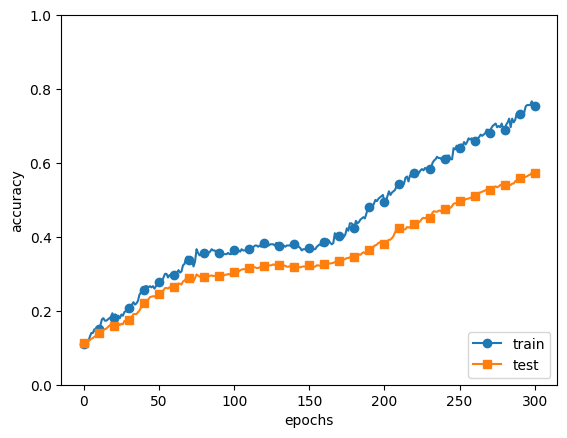

In [5]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()